In [137]:
#%run ./Data-Exploration.ipynb

# Input Data

In [8]:
!ls ../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports

01-22-2020.csv 02-09-2020.csv 02-27-2020.csv 03-16-2020.csv 04-03-2020.csv
01-23-2020.csv 02-10-2020.csv 02-28-2020.csv 03-17-2020.csv 04-04-2020.csv
01-24-2020.csv 02-11-2020.csv 02-29-2020.csv 03-18-2020.csv 04-05-2020.csv
01-25-2020.csv 02-12-2020.csv 03-01-2020.csv 03-19-2020.csv 04-06-2020.csv
01-26-2020.csv 02-13-2020.csv 03-02-2020.csv 03-20-2020.csv 04-07-2020.csv
01-27-2020.csv 02-14-2020.csv 03-03-2020.csv 03-21-2020.csv 04-08-2020.csv
01-28-2020.csv 02-15-2020.csv 03-04-2020.csv 03-22-2020.csv 04-09-2020.csv
01-29-2020.csv 02-16-2020.csv 03-05-2020.csv 03-23-2020.csv 04-10-2020.csv
01-30-2020.csv 02-17-2020.csv 03-06-2020.csv 03-24-2020.csv 04-11-2020.csv
01-31-2020.csv 02-18-2020.csv 03-07-2020.csv 03-25-2020.csv 04-12-2020.csv
02-01-2020.csv 02-19-2020.csv 03-08-2020.csv 03-26-2020.csv 04-13-2020.csv
02-02-2020.csv 02-20-2020.csv 03-09-2020.csv 03-27-2020.csv 04-14-2020.csv
02-03-2020.csv 02-21-2020.csv 03-10-2020.csv 03-28-2020.csv 04-15-2020.csv
02-04-2020.csv 02-22-2020

In [53]:
import pandas as pd
import numpy as np
import glob

In [10]:
inPath = '../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'

In [11]:
df = pd.concat(map(pd.read_csv, glob.glob( inPath + '/*.csv')))

/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
# test
df.tail()

,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
3067,363.0,NaN,West Bank and Gaza,437.0,NaN,West Bank and Gaza,3.0,NaN,NaN,2020-04-19 23:40:41,31.952200,NaN,35.233200,NaN,NaN,NaN,71.0
3068,6.0,NaN,Western Sahara,6.0,NaN,Western Sahara,0.0,NaN,NaN,2020-04-19 23:40:41,24.215500,NaN,-12.885800,NaN,NaN,NaN,0.0
3069,1.0,NaN,Yemen,1.0,NaN,Yemen,0.0,NaN,NaN,2020-04-19 23:40:41,15.552727,NaN,48.516388,NaN,NaN,NaN,0.0
3070,25.0,NaN,Zambia,61.0,NaN,Zambia,3.0,NaN,NaN,2020-04-19 23:40:41,-13.133897,NaN,27.849332,NaN,NaN,NaN,33.0
3071,20.0,NaN,Zimbabwe,25.0,NaN,Zimbabwe,3.0,NaN,NaN,2020-04-19 23:40:41,-19.015438,NaN,29.154857,NaN,NaN,NaN,2.0


## Data Consistency

In [13]:
# some Coutries have 'Last Update' , others 'Last_Update' 

In [14]:
df['Last_Update'] = df['Last Update'].fillna(df['Last_Update'])

In [15]:
df = df.drop(['Last Update'], axis=1)

In [16]:
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

In [17]:
# Some have 'Lat', 'Latitude', 'Long_' ..

In [18]:
df['Lat'] = df['Latitude'].fillna(df['Lat'])
df = df.drop(['Latitude'], axis=1)
df['lat'] = df['Lat']
df = df.drop(['Lat'], axis=1)

In [19]:
df['Long_'] = df['Longitude'].fillna(df['Long_'])
df = df.drop(['Longitude'], axis=1)
df['long'] = df['Long_']
df = df.drop(['Long_'], axis=1)

In [20]:
# Some have Province/State, others Province_State

In [21]:
df['Province_State'] = df['Province/State'].fillna(df['Province_State'])
df = df.drop(['Province/State'], axis=1)

In [22]:
# Some have 'Country/Region', others 'Country_Region'

In [23]:
df['Country_Region'] = df['Country/Region'].fillna(df['Country_Region'])
df = df.drop(['Country/Region'], axis=1)

In [24]:
# Treat Missing Province_State as Undefined, not NaN
df['Province_State'] = df['Province_State'].fillna('Undefined')

In [25]:
df.head()

,Active,Admin2,Combined_Key,Confirmed,Country_Region,Deaths,FIPS,Last_Update,Province_State,Recovered,lat,long
0,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,2020-01-22 17:00:00,Anhui,NaN,NaN,NaN
1,NaN,NaN,NaN,14.0,Mainland China,NaN,NaN,2020-01-22 17:00:00,Beijing,NaN,NaN,NaN
2,NaN,NaN,NaN,6.0,Mainland China,NaN,NaN,2020-01-22 17:00:00,Chongqing,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,2020-01-22 17:00:00,Fujian,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,2020-01-22 17:00:00,Gansu,NaN,NaN,NaN


In [26]:
df.count()

Active            87971
Admin2            80339
Combined_Key      87971
Confirmed         95569
Country_Region    95588
Deaths            95147
FIPS              79893
Last_Update       95588
Province_State    95588
Recovered         95200
lat               91724
long              91724
dtype: int64

In [27]:
# Prepare Timeseries

In [28]:
df = df.set_index('Last_Update')

In [29]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

# Utilities

In [37]:
def getCountry(country, feature='Deaths'):
    '''
    return a DataFrame for selected Country
    
    I resample data daily and take the * last * over reported deaths
    
    NOTE: 
    
    In Countries like Italy, I found multiple reported data per day.
    
    I use last because in a Country without reported States, Administrations, it seems there is only
    one central authority to report sequentially data.
    So last along the day (or mean) will reflect well.
    
   
    '''
    return df[df['Country_Region'] == country].resample('D')[ feature].last()


#getCountry('Italy').loc['2020-01-31']

In [54]:
def getCountryAggregated(country, feature='Deaths'):
    '''
    return a Series for a feature of selected Country, aggregating All regions for daily period
    Example:
        
        2020-03-11 Hubei, China 3046
        2020-03-11 Guangdong, China 8
        ...
        
        => 
        2020-03-11 China 3054
           
    
    Note: sum of NaN are here treated as NaN
    
    
    Note: for Countries having independent reporting agencies, as States, Administratons, 
    I cannot nomore look at the last timestamp or mean, for I should decompose for each district granularly.
    
    I will resample data by the sum.
    I do not check if a State or Admin is reporting data twice.
    
    '''
    
    isCentralAgency = True if len(  set(df[df['Country_Region'] == country]['Combined_Key'].dropna() ) ) < 2 else False 
    
    if (isCentralAgency):    
        return getCountry(country, feature)
    
    else:
        return df[df['Country_Region'] == country].groupby(pd.Grouper(freq='D'))[ feature ].sum(min_count=1)
        #resample_aggregated_by_Province = df[df['Country_Region'] == country ].groupby(['Province_State']).resample('D').sum(min_count=1)
        #return resample_aggregated_by_Province.groupby(['Last_Update'])[ feature ].sum(min_count=1)


In [55]:
#getCountryAggregated('Italy').plot(marker='.', alpha=1., linestyle='-')

In [56]:
def getCountryProvince(country, province, feature = 'Deaths'):
    return df[df['Country_Region'] == 'China'].groupby(['Province_State']).resample('D')[ feature].sum(min_count=1).loc[ province ]


In [57]:
#getCountryProvince('China', 'Hubei').plot(marker='.', alpha=1., linestyle='-');

In [58]:
def getDailyPercentualChange(country, feature='Deaths'):
    '''
    return a Series of daily % changes, of feature of selected Country.
    All regions in the Country are aggregated for daily period.
    '''
    #return getCountryAggregated(country, feature).fillna(method='ffill').pct_change()
    # I replace 0 to NaN (Nan/Nan yield 0)
    return getCountryAggregated(country, feature).pct_change().replace(0, np.nan)

# Plots

In [59]:
import matplotlib.pyplot as plt

# Optional Set seaborn styles

import seaborn as sns
sns.set(rc={'figure.figsize':(12, 5)})

### Trends of Deaths

In [60]:
# Italy

In [61]:
df[df['Country_Region'] == 'Italy'].loc['2020-03-01' : '2020-03-16'];

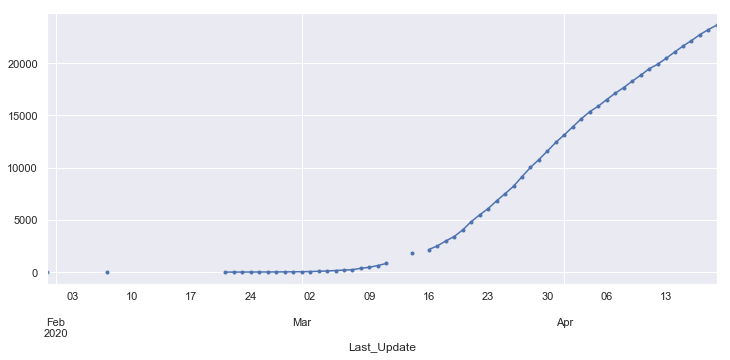

In [62]:
getCountry( 'Italy' ).plot(marker='.', alpha=1., linestyle='-');

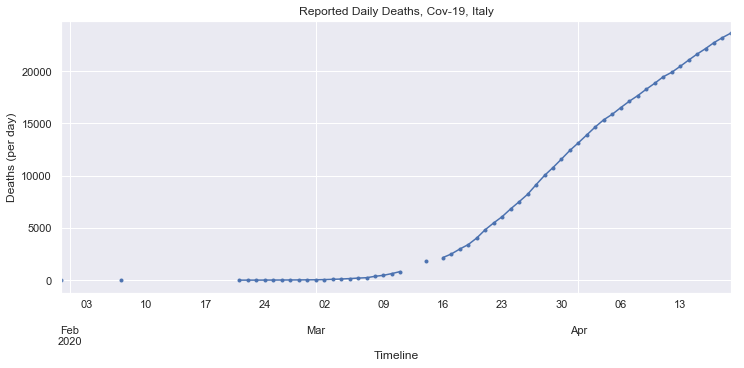

In [63]:
Country  = 'Italy'
ax = getCountryAggregated( Country ).plot(marker='.', alpha=1., linestyle='-');
ax.set(xlabel='Timeline', ylabel='Deaths (per day)', title='Reported Daily Deaths, Cov-19, {}'.format( Country ));

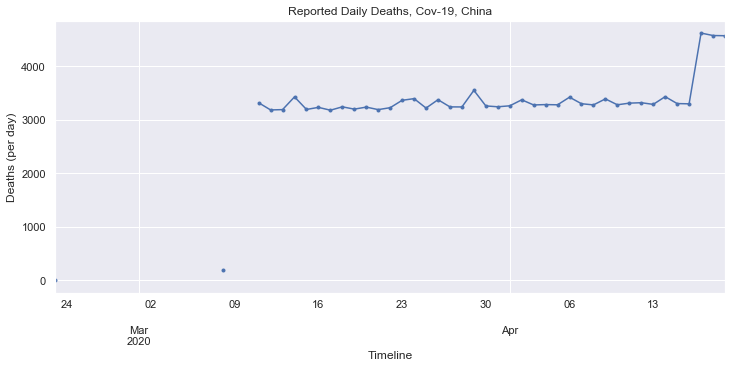

In [64]:
#China > TODO check this graph is make sense
Country  = 'China'
ax = getCountryAggregated( Country ).plot(marker='.', alpha=1., linestyle='-');
ax.set(xlabel='Timeline', ylabel='Deaths (per day)', title='Reported Daily Deaths, Cov-19, {}'.format( Country ));

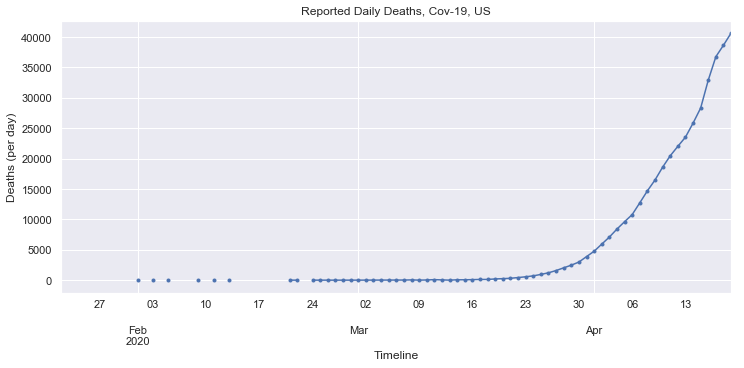

In [65]:
#US
Country  = 'US'
ax = getCountryAggregated( Country ).plot(marker='.', alpha=1., linestyle='-');
ax.set(xlabel='Timeline', ylabel='Deaths (per day)', title='Reported Daily Deaths, Cov-19, {}'.format( Country ));

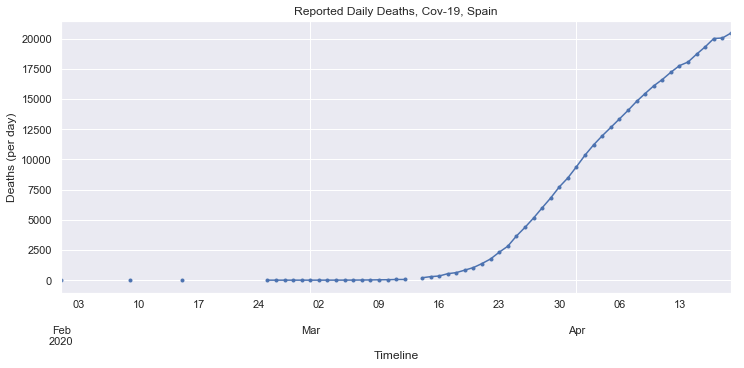

In [66]:
#Spain
Country  = 'Spain'
ax = getCountryAggregated( Country ).plot(marker='.', alpha=1., linestyle='-');
ax.set(xlabel='Timeline', ylabel='Deaths (per day)', title='Reported Daily Deaths, Cov-19, {}'.format( Country ));

### Change VS former day (fatalities)

In [67]:
# Note: 
# spikes to -1 indicates that today there are no fatalities reported. So, respect to yesterday, there is a drop of 100%
# Better way to communicate?

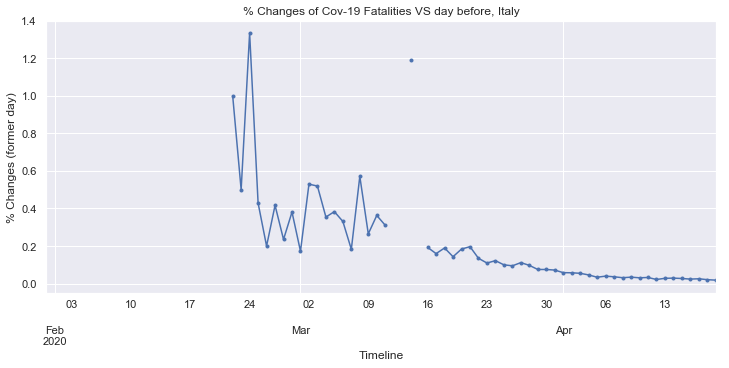

In [68]:
Country  = 'Italy'
ax = getDailyPercentualChange( Country ).plot(marker='.', alpha=1., linestyle='-')
ax.set(xlabel='Timeline', ylabel='% Changes (former day)', title='% Changes of Cov-19 Fatalities VS day before, {}'.format( Country ));


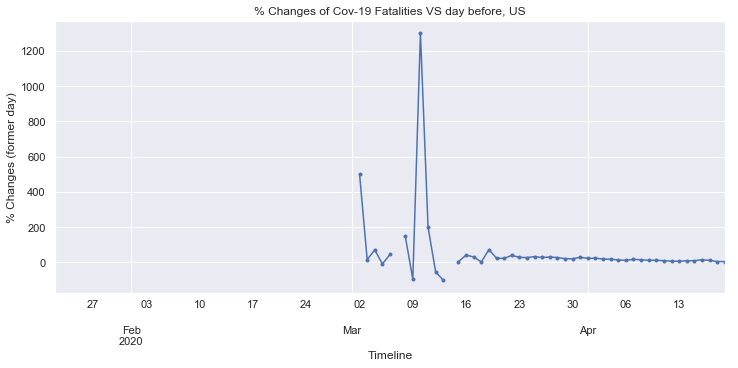

In [69]:
Country  = 'US'
ax = getDailyPercentualChange( Country ).apply(lambda x : x*100).plot(marker='.', alpha=1., linestyle='-');

ax.set(xlabel='Timeline', ylabel='% Changes (former day)', title='% Changes of Cov-19 Fatalities VS day before, {}'.format( Country ));

In [70]:
# ??
# Is it US hiding a bit of deaths after the spike of 1200% ?

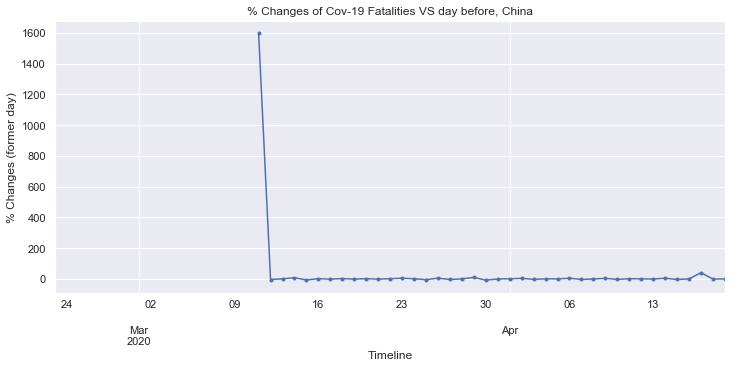

In [71]:
Country  = 'China'
ax = getDailyPercentualChange( Country ).apply(lambda x : x*100).plot(marker='.', alpha=1., linestyle='-');

ax.set(xlabel='Timeline', ylabel='% Changes (former day)', title='% Changes of Cov-19 Fatalities VS day before, {}'.format( Country ));

In [72]:
# Note:
# asymptotes goes to 0. But on high numbers, few percentages yields lot of deahts.
# May Initial spikes  be higehr because reflect time of Country to decide on what measures to take ?

#### Let's zoom in a bit.. 

[Text(0, 0.5, '% Changes (former day)'),
 Text(0.5, 0, 'Timeline'),
 Text(0.5, 1.0, '% Changes of Cov-19 Fatalities VS before day, Italy')]

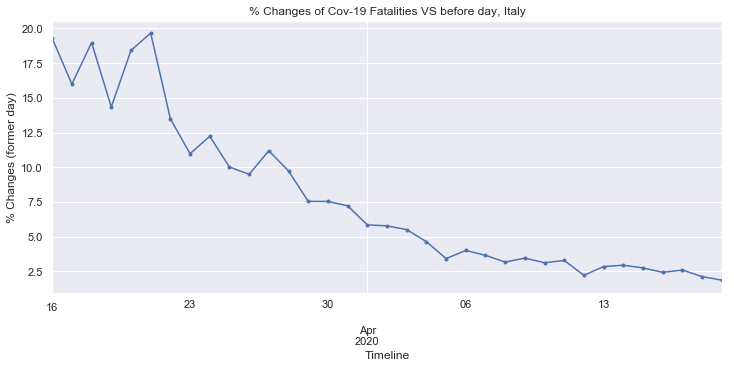

In [73]:
Country  = 'Italy'
ax = getDailyPercentualChange( Country ) \
.loc['2020-03-16' : ] \
.resample('1d').mean() \
.apply(lambda x : x*100) \
.plot(marker='.', alpha=1., linestyle='-');
ax.set(xlabel='Timeline', ylabel='% Changes (former day)', title='% Changes of Cov-19 Fatalities VS before day, {}'.format( Country ))

Text(0.5, 1.0, 'Linear Decay of Deaths Ratio Variation since 2020-03-16 - Italy')

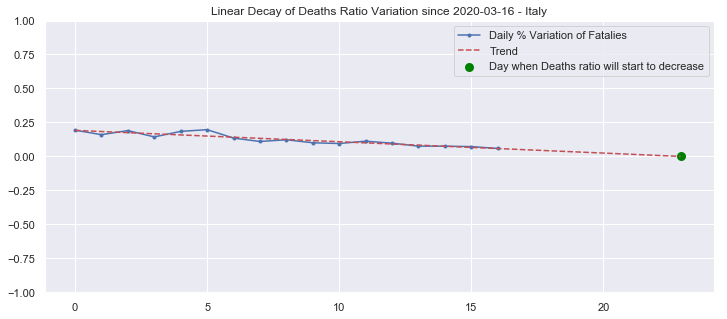

In [105]:
# test April 8th

Country = 'Italy'

# Find the slope and intercept of the best fit line
y = getDailyPercentualChange( Country ).loc['2020-03-16' : '2020-04-01'] \
    .resample('1d').mean() \
    .replace([np.inf, -np.inf], np.nan).dropna()

x = range(0, len(y))
slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x, y, color = 'b', marker='.', label='Daily % Variation of Fatalies')
#plt.plot(x, x*slope + intercept, 'r')
plt.plot((x[0], -intercept/slope), (x[0]*slope + intercept, 0), color = 'r', linestyle='--', label = 'Trend')
plt.scatter(-intercept/slope, 0, color='green', linewidths=3, label='Day when Deaths ratio will start to decrease')

plt.ylim(-1, 1)
plt.legend()
plt.title('Linear Decay of Deaths Ratio Variation since {} - {}'.format('2020-03-16', Country))
#plt.show()

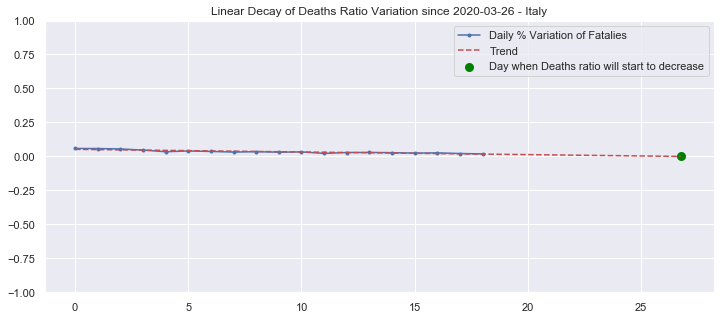

In [113]:
# test April 20th

Country = 'Italy'

# Find the slope and intercept of the best fit line
y = getDailyPercentualChange( Country ).loc['2020-04-01' : '2020-04-19'] \
    .resample('1d').mean() \
    .replace([np.inf, -np.inf], np.nan).dropna()

x = range(0, len(y))
slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x, y, color = 'b', marker='.', label='Daily % Variation of Fatalies')
#plt.plot(x, x*slope + intercept, 'r')
plt.plot((x[0], -intercept/slope), (x[0]*slope + intercept, 0), color = 'r', linestyle='--', label = 'Trend')
plt.scatter(-intercept/slope, 0, color='green', linewidths=3, label='Day when Deaths ratio will start to decrease')

plt.ylim(-1, 1)
plt.legend()
plt.title('Linear Decay of Deaths Ratio Variation since {} - {}'.format('2020-03-26', Country))
plt.show()

# Questions

In [86]:
import datetime

In [118]:
'''
Notes - Approximating a linear model to predict a decay trend.

It must be applied on a last set of data (about 2 weeks),
and yield better results when the tail approximates a linear trend (asymptote toward X-axis).
Tradeoff: short-time prediction (about 1 week)
'''

'\nNotes - Approximating a linear model to predict a decay trend.\n\nIt must be applied on a last set of data (about 2 weeks),\nand yield better results when the tail approximates a linear trend (asymptote toward X-axis).\nTradeoff: short-time prediction (about 1 week)\n'

In [107]:
# When deaths' trend may start to become negative in Italy?
datetime.datetime.strptime('2020-03-16','%Y-%m-%d') + datetime.timedelta(days = round(-intercept/slope) )

# Using data from 16 March - 1st April => Around 8th April 2020

datetime.datetime(2020, 4, 8, 0, 0)

In [117]:
# When deaths' trend may start to become negative in Italy?
datetime.datetime.strptime('2020-04-01','%Y-%m-%d') + datetime.timedelta(days = round(-intercept/slope) )

# Using data from 1st April - 19th April => Around 28th April 2020

datetime.datetime(2020, 4, 28, 0, 0)

In [429]:
# When deaths rate may drop to 0 ( today no more deaths and stable, VS day before)?
# Linear model does NOT represent well decay of a contagion.
# however,  may it be a worst case scenario ? (Assuming restrictions on people's contact will continue...)

datetime.datetime.strptime('2020-03-16','%Y-%m-%d') + datetime.timedelta(days = round((-1. -intercept) / slope )  )

# In the Mid of August....

datetime.datetime(2020, 8, 12, 0, 0)

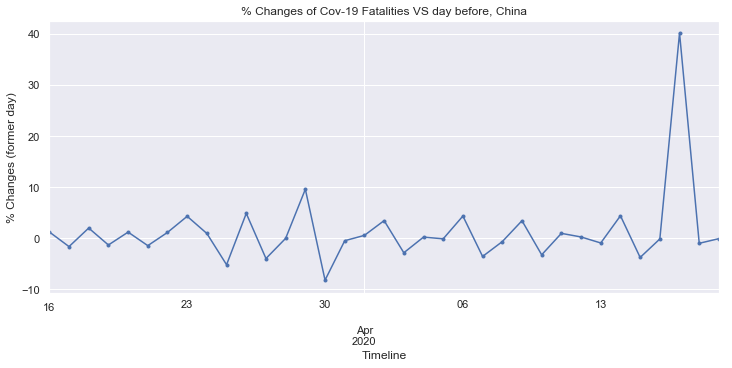

In [120]:
Country  = 'China'
ax = getDailyPercentualChange( Country ) \
.loc['2020-03-16' : ] \
.resample('1d').mean() \
.apply(lambda x : x*100) \
.plot(marker='.', alpha=1., linestyle='-');
ax.set(xlabel='Timeline', ylabel='% Changes (former day)', title='% Changes of Cov-19 Fatalities VS day before, {}'.format( Country ));

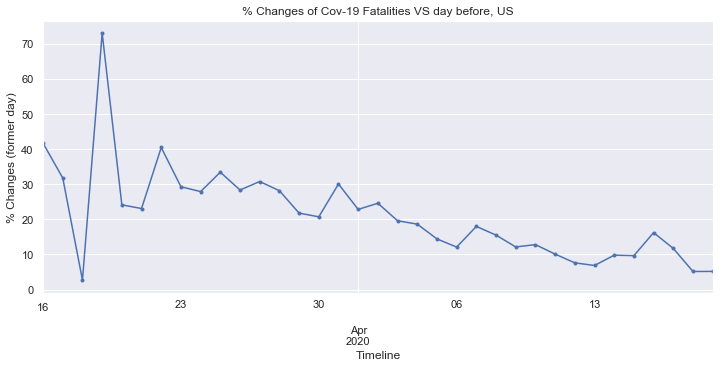

In [121]:
Country  = 'US'
ax = getDailyPercentualChange( Country ) \
.loc['2020-03-16' : ] \
.resample('1d').mean() \
.apply(lambda x : x*100) \
.plot(marker='.', alpha=1., linestyle='-');
ax.set(xlabel='Timeline', ylabel='% Changes (former day)', title='% Changes of Cov-19 Fatalities VS day before, {}'.format( Country ));

In [269]:
# Note:
# If above assumption holds true (TODO check with Press), then a delay plays real big time 
# US % Changes are 3x than Italy even after measures have been adopted (since 15th March onward ? - check) 

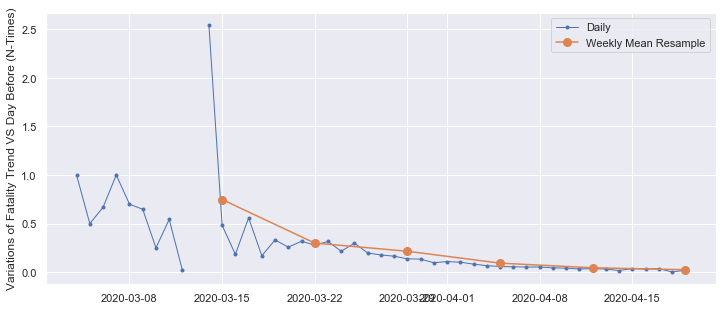

In [122]:
fig, ax = plt.subplots()
ax.plot(getDailyPercentualChange( 'Spain' ), marker='.', linestyle='-', linewidth=1, label='Daily')
ax.plot(getDailyPercentualChange( 'Spain' ).resample('W').mean(), marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Variations of Fatality Trend VS Day Before (N-Times)')
ax.legend();

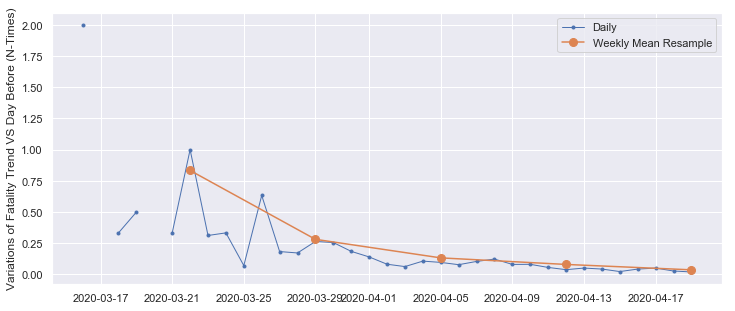

In [126]:
fig, ax = plt.subplots()
ax.plot(getDailyPercentualChange( 'Austria' ), marker='.', linestyle='-', linewidth=1, label='Daily')
ax.plot(getDailyPercentualChange( 'Austria' ).resample('W').mean(), marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Variations of Fatality Trend VS Day Before (N-Times)')
ax.legend();

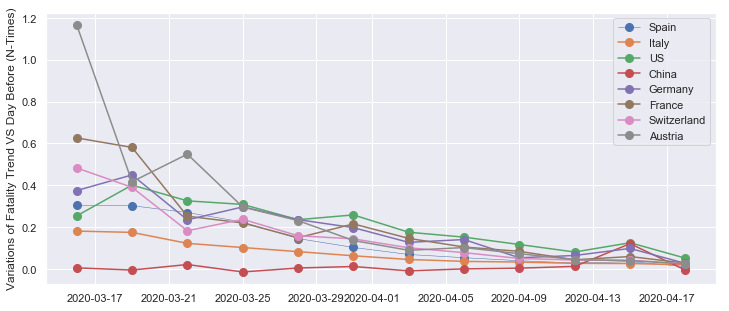

In [133]:
# The Decay seems kind of similar but... how much important it is the response of a Country...
# Though, here does not reflect an even time after epidemic hit the Country

fig, ax = plt.subplots()
ax.plot(getDailyPercentualChange( 'Spain' ).loc['2020-03-16' : ].resample('3D').mean() , marker='o', markersize=8, linestyle='-', linewidth=0.5, label='Spain')
ax.plot(getDailyPercentualChange( 'Italy' ).loc['2020-03-16' : ].resample('3D').mean()  , marker='o', markersize=8, linestyle='-', label='Italy')
ax.plot(getDailyPercentualChange( 'US' ).loc['2020-03-16' : ].resample('3D').mean()  , marker='o', markersize=8, linestyle='-', label='US')
ax.plot(getDailyPercentualChange( 'China' ).loc['2020-03-16' : ].resample('3D').mean()  , marker='o', markersize=8, linestyle='-', label='China')
ax.plot(getDailyPercentualChange( 'Germany' ).loc['2020-03-16' : ].resample('3D').mean()  , marker='o', markersize=8, linestyle='-', label='Germany')
ax.plot(getDailyPercentualChange( 'France' ).loc['2020-03-16' : ].resample('3D').mean()  , marker='o', markersize=8, linestyle='-', label='France')
ax.plot(getDailyPercentualChange( 'Switzerland' ).loc['2020-03-16' : ].resample('3D').mean()  , marker='o', markersize=8, linestyle='-', label='Switzerland')
ax.plot(getDailyPercentualChange( 'Austria' ).loc['2020-03-16' : ].resample('3D').mean()  , marker='o', markersize=8, linestyle='-', label='Austria')


ax.set_ylabel('Variations of Fatality Trend VS Day Before (N-Times)')
ax.legend();

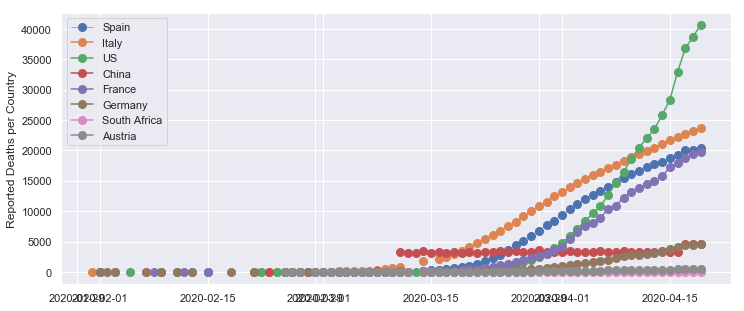

In [125]:
fig, ax = plt.subplots()
ax.plot(getCountryAggregated( 'Spain' ), marker='o', markersize=8, linestyle='-', linewidth=0.5, label='Spain')
ax.plot(getCountryAggregated( 'Italy' ), marker='o', markersize=8, linestyle='-', label='Italy')
ax.plot(getCountryAggregated( 'US' ), marker='o', markersize=8, linestyle='-', label='US')
ax.plot(getCountryAggregated( 'China' ), marker='o', markersize=8, linestyle='-', label='China')
ax.plot(getCountryAggregated( 'France' ), marker='o', markersize=8, linestyle='-', label='France')
ax.plot(getCountryAggregated( 'Germany' ), marker='o', markersize=8, linestyle='-', label='Germany')
ax.plot(getCountryAggregated( 'South Africa' ), marker='o', markersize=8, linestyle='-', label='South Africa')
ax.plot(getCountryAggregated( 'Austria' ), marker='o', markersize=8, linestyle='-', label='Austria')
ax.set_ylabel('Reported Deaths per Country')
ax.legend();

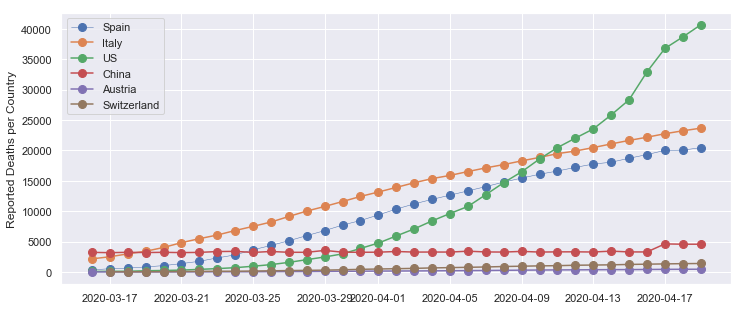

In [129]:
fig, ax = plt.subplots()
ax.plot(getCountryAggregated( 'Spain' ).loc['2020-03-16' : ] , marker='o', markersize=8, linestyle='-', linewidth=0.5, label='Spain')
ax.plot(getCountryAggregated( 'Italy' ).loc['2020-03-16' : ] , marker='o', markersize=8, linestyle='-', label='Italy')
ax.plot(getCountryAggregated( 'US' ).loc['2020-03-16' : ] , marker='o', markersize=8, linestyle='-', label='US')
ax.plot(getCountryAggregated( 'China' ).loc['2020-03-16' : ] , marker='o', markersize=8, linestyle='-', label='China')
ax.plot(getCountryAggregated( 'Austria' ).loc['2020-03-16' : ] , marker='o', markersize=8, linestyle='-', label='Austria')
ax.plot(getCountryAggregated( 'Switzerland' ).loc['2020-03-16' : ] , marker='o', markersize=8, linestyle='-', label='Switzerland')


ax.set_ylabel('Reported Deaths per Country')
ax.legend();